In [15]:

from keras.preprocessing.image import ImageDataGenerator
import sys
sys.path.append('C:/Users/manya/Documents/Ironhack/Course/Final-project/src')
import CNN_model 
import keras 
import seaborn as sns
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

## MODEL 2: WITH DATA AUGMENTATION

In [2]:

def Image_Data_Generator (path, target_size, batch_size): 

    """This function is used to create an image data flow generator that serves to provide 
    batches of image data during the training, validation and test phases of the model. The generator
    realizes the loading and pre-processing of the data and it returns batches of images along with 
    their labels. The function takes the following arguments: 
    - train_path, validation_path and test_path: paths to each set of images
    - target_size: tuple that is the width and height in pixel of the images
    - batch size: int, number of samples (images) propagated through the network """
    
    gen = ImageDataGenerator(rescale = 1.0/255.0, # Normalise the data (0,1)
                            rotation_range=40,  # Rango de rotación en grados
                            width_shift_range=0.2,  # Rango de traslación horizontal
                            height_shift_range=0.2,  # Rango de traslación vertical
                            shear_range=0.2,  # Rango de deformación
                            zoom_range=0.2,  # Rango de zoom
                            horizontal_flip=True,  # Voltear horizontalmente
                            vertical_flip=True ) 
    image_generator = gen.flow_from_directory(
                                            path,
                                            target_size=target_size,
                                            batch_size=batch_size,
                                            class_mode='categorical')

    
    return image_generator

In [3]:
train_image_generator = Image_Data_Generator('../images/train', (150,150),32)

Found 11000 images belonging to 11 classes.


In [4]:
val_image_generator = Image_Data_Generator('../images/validation/', (150,150), 32)
test_image_generator = Image_Data_Generator('../images/test/',(150,150), 32)

Found 2200 images belonging to 11 classes.
Found 2200 images belonging to 11 classes.


In [6]:
model_2 = CNN_model.model_creation_1(11,[150,150,3])
model_2.save('../models/model_2.keras') 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 87616)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [7]:
history = CNN_model.train_model(model_2, train_image_generator, val_image_generator,100)

Epoch 1/100
344/344 [==============================] - 493s 1s/step - loss: 1.5675 - accuracy: 0.4400 - val_loss: 1.0006 - val_accuracy: 0.6491
Epoch 2/100
344/344 [==============================] - 434s 1s/step - loss: 0.9683 - accuracy: 0.6638 - val_loss: 0.8009 - val_accuracy: 0.7059
Epoch 3/100
344/344 [==============================] - 462s 1s/step - loss: 0.7835 - accuracy: 0.7320 - val_loss: 0.5928 - val_accuracy: 0.7982
Epoch 4/100
344/344 [==============================] - 756s 2s/step - loss: 0.6360 - accuracy: 0.7857 - val_loss: 0.4620 - val_accuracy: 0.8518
Epoch 5/100
344/344 [==============================] - 478s 1s/step - loss: 0.5703 - accuracy: 0.8104 - val_loss: 0.4142 - val_accuracy: 0.8805
Epoch 6/100
344/344 [==============================] - 468s 1s/step - loss: 0.4797 - accuracy: 0.8436 - val_loss: 0.3029 - val_accuracy: 0.9095
Epoch 7/100
344/344 [==============================] - 481s 1s/step - loss: 0.4434 - accuracy: 0.8567 - val_loss: 0.3033 - val_accuracy:

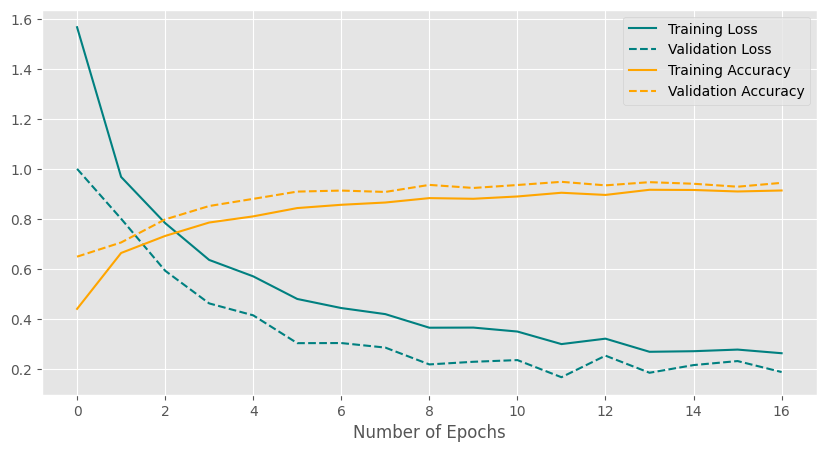

In [8]:
performance_model_2 = CNN_model.plot_trainig_metrics(history)
performance_model_2.savefig('../graphs/m2_performance')

In [9]:
model_2.evaluate(test_image_generator)

69/69 [==============================] - 10s 149ms/step - loss: 0.1808 - accuracy: 0.9405


[0.18077312409877777, 0.9404545426368713]

In [10]:
predictions = model_2.predict(test_image_generator)

69/69 [==============================] - 10s 146ms/step


In [11]:
def plot_confusion_matrix (test_image_generator, predictions): 
    y_pred = np.argmax(predictions, axis=1)
    y_true = test_image_generator.classes

    matrix = metrics.confusion_matrix(y_true,y_pred)

    fig = sns.heatmap(matrix, annot = True)

    return fig


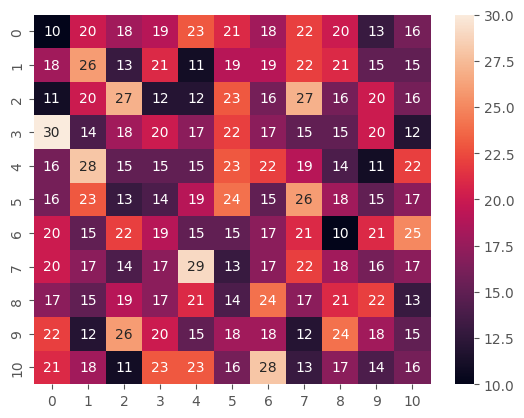

In [16]:
plot_confusion_matrix(test_image_generator,predictions)
plt.savefig('../graphs/m2_confusion_matrix.png')

https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/#h-image-augmentation-a-refresher
